# 이미지 데이터 분석

## Keras를 활용한 얼리스톱핑 / TensorBoard를 사용한 분석 모니터링
---
과적합으로 인한 예측력 감소 방지를 위해 얼리 스톱핑(early stopping)이라는 테크닉을 사용한다.

학습 기록을 log_model에 저장하고 텐서보드로 모니터함

### 이미지 불러오기

#### 학습용 데이터 불러오기 및 정규화

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train = ImageDataGenerator().flow_from_directory('dog-vs-cat/train',
                                                  target_size=(100, 100), # 변환 크기
                                                  class_mode = 'binary'   # 고양이 or 개로 binary 분류
                                                 )

Found 2000 images belonging to 2 classes.


#### 검증용 데이터 불러오기

In [3]:
valid = ImageDataGenerator(rescale = 1/255).flow_from_directory('dog-vs-cat/train',
                                                                target_size=(100, 100), 
                                                                class_mode = 'binary',
                                                                shuffle=False)

Found 2000 images belonging to 2 classes.


### 학습

In [4]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 1)                 30001     
                                                                 
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

In [7]:
model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=Adam(lr=0.001))

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
LOG_DIR = 'log_model'
hist = model.fit_generator(train, validation_data = valid, epochs=30, 
                          callbacks = [
                              TensorBoard(log_dir=LOG_DIR),
                              EarlyStopping(monitor="val_loss", patience=2)
                          ]) 
# 검증 데이터의 손실(val_loss)을 모니터하다가 더이상 손실이 줄어들지 않으면 학습을 멈춘다. 
# 단, 손실이 감소하지 않더라도 2번까지는 기다린다. (patience=2)

Epoch 1/30


C:\Users\User\AppData\Local\Temp\ipykernel_2500\2668859293.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, validation_data = valid, epochs=30,


63/63 [==============================] - 12s 177ms/step - loss: 393.4684 - acc: 0.5160 - val_loss: 0.8668 - val_acc: 0.5005
Epoch 2/30
63/63 [==============================] - 10s 166ms/step - loss: 126.2869 - acc: 0.5330 - val_loss: 0.6969 - val_acc: 0.5550
Epoch 3/30
63/63 [==============================] - 13s 210ms/step - loss: 74.9240 - acc: 0.5795 - val_loss: 0.6158 - val_acc: 0.6765
Epoch 4/30
63/63 [==============================] - 10s 166ms/step - loss: 59.8547 - acc: 0.6120 - val_loss: 0.6051 - val_acc: 0.7090
Epoch 5/30
63/63 [==============================] - 10s 164ms/step - loss: 77.3241 - acc: 0.5925 - val_loss: 0.6799 - val_acc: 0.5625
Epoch 6/30
63/63 [==============================] - 10s 162ms/step - loss: 103.8292 - acc: 0.6015 - val_loss: 0.5878 - val_acc: 0.7260
Epoch 7/30
63/63 [==============================] - 10s 162ms/step - loss: 53.5752 - acc: 0.6225 - val_loss: 0.5772 - val_acc: 0.7415
Epoch 8/30
63/63 [==============================] - 10s 164ms/step - l

In [9]:
import matplotlib.pyplot as plt

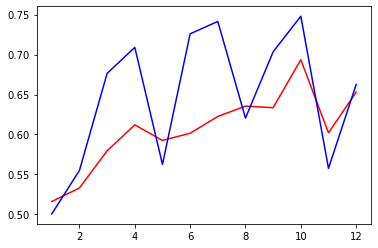

In [10]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.show()